Q1: What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

pr(pass|quick) = ?

given that: 

pr(pass) = 0.9 

pr(quick|pass) = 0.6

pr(not pass) = 1-pr(pass) = 0.1

pr(quick|not pass) = 0.3

pr(pass|quick) = pr(quick|pass)pr(pass)/pr(quick)

We know pr(quick|pass)pr(pass) 

To find Pr(quick), we use law of total probability 

In [1]:
pr_pass = 0.9 
pr_quick_pass = 0.6
pr_notpass = 0.1
pr_quick_notpass = 0.3

pr_quick = pr_pass*pr_quick_pass + pr_notpass*pr_quick_notpass
print(pr_quick)

0.5700000000000001


In [2]:
pr_pass_quick = pr_quick_pass*pr_pass/pr_quick
print(pr_pass_quick)

0.9473684210526315


pr(pass|quick) is approximately 0.947

**Likelihood**:
  $$p(x \mid \theta, n) = \text{Multinomial}(x \mid n, \theta)$$

**Prior**:
  $$p(\theta \mid \alpha) = \text{Dirichlet}(\theta \mid \alpha)$$

**Posterior**:
  $$p(\theta \mid x, n, \alpha) \propto p(x \mid \theta, n) p(\theta \mid \alpha)$$

**Likelihood**:
   The multinomial likelihood is:
   $$p(x \mid \theta, n) \propto \prod_{i} \theta_i^{x_i},$$
   where $$x_i$$ is numbers of categories i.

**Prior**:
   The Dirichlet prior is:
   $$p(\theta \mid \alpha) \propto \prod_{i} \theta_i^{\alpha_i - 1}.$$

**Combine Likelihood and Prior**:
   Using Bayes' theorem:
   $$p(\theta \mid x, n, \alpha) \propto \prod_{i} \theta_i^{x_i} \prod_{i} \theta_i^{\alpha_i - 1}.$$
   
   $$p(\theta \mid x, n, \alpha) \propto \prod_{i} \theta_i^{x_i + \alpha_i - 1}.$$

**Posterior Distribution**:
   The posterior is still a Diriclet
   $$p(\theta \mid x, n, \alpha) = \text{Dirichlet}(\theta \mid \alpha + x),$$
   where the updated parameter for Dirichlet $$\alpha' = \alpha + x$$
   

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

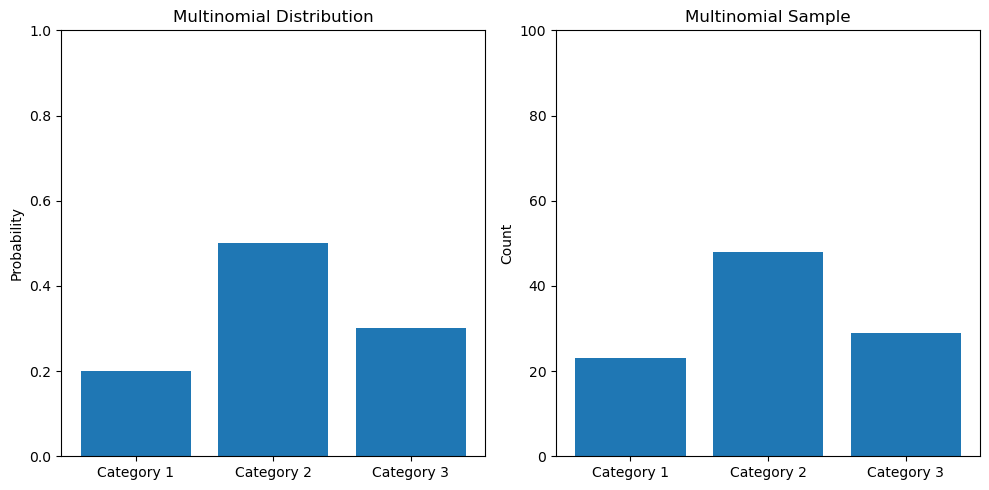

In [8]:
#create three category multinomial distribution and visualize the multinomial distribution and the multinomial sample

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
n_trials = 100
probabilities = [0.2, 0.5, 0.3] 
categories = 3
#Sample
sample_stats = stats.multinomial.rvs(n_trials, probabilities, size=5)[0]

plt.figure(figsize=(10, 5))

# True dist
plt.subplot(1, 2, 1)
plt.bar(range(categories), probabilities, tick_label=["Category 1", "Category 2", "Category 3"])
plt.title("Multinomial Distribution")
plt.ylabel("Probability")
plt.ylim(0, 1)

# Sample
plt.subplot(1, 2, 2)
plt.bar(range(categories), sample_stats, tick_label=["Category 1", "Category 2", "Category 3"])
plt.title("Multinomial Sample")
plt.ylabel("Count")
plt.ylim(0, n_trials)

plt.tight_layout()
plt.show()

In [6]:
!pip install mpltern

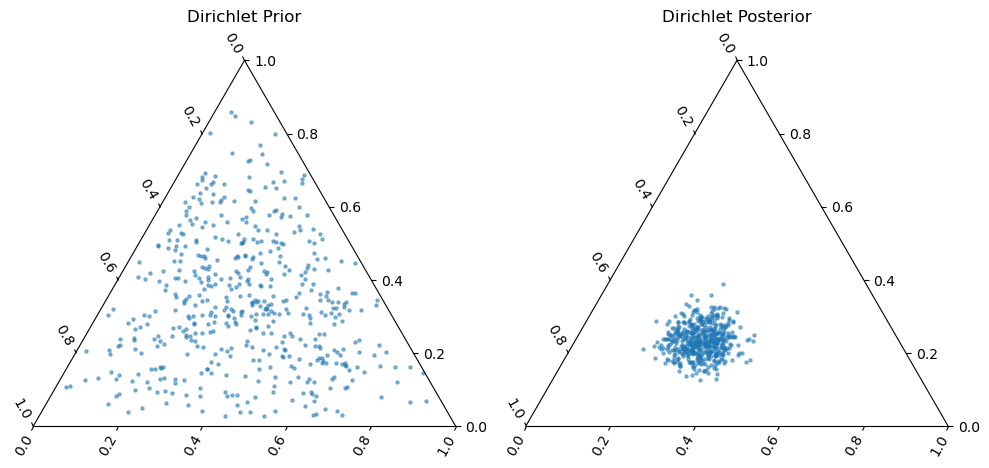

In [9]:
import mpltern

# Parameters for Dirichlet prior and posterior
alpha_prior = [2, 2, 2]  # Prior parameters
alpha_posterior = alpha_prior + sample_stats  # Posterior parameters (after observing some data)

# Sampling from Dirichlet distributions
n_samples = 500
samples_prior = np.random.dirichlet(alpha_prior, size=n_samples)
samples_posterior = np.random.dirichlet(alpha_posterior, size=n_samples)

# Create ternary plot for prior
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='ternary')
ax1.scatter(samples_prior[:, 0], samples_prior[:, 1], samples_prior[:, 2], s=5, alpha=0.5)
ax1.set_title("Dirichlet Prior")

# Create ternary plot for posterior
ax2 = fig.add_subplot(122, projection='ternary')
ax2.scatter(samples_posterior[:, 0], samples_posterior[:, 1], samples_posterior[:, 2], s=5, alpha=0.5)
ax2.set_title("Dirichlet Posterior")

plt.tight_layout()
plt.show()
    